# GammaSim


The simulator for GammaSky can be used by importing the `GammaSim` class as explained below

In [1]:
from gammasim import GammaSim

/home/falco/Documents/dl1_refactor/gammalib/gammasim/gammasim_venv/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
gammasim = GammaSim('config.json')

In [3]:
gammasim.generate_dataset(False)

100%|██████████| 1000/1000 [00:00<00:00, 4216.36it/s]


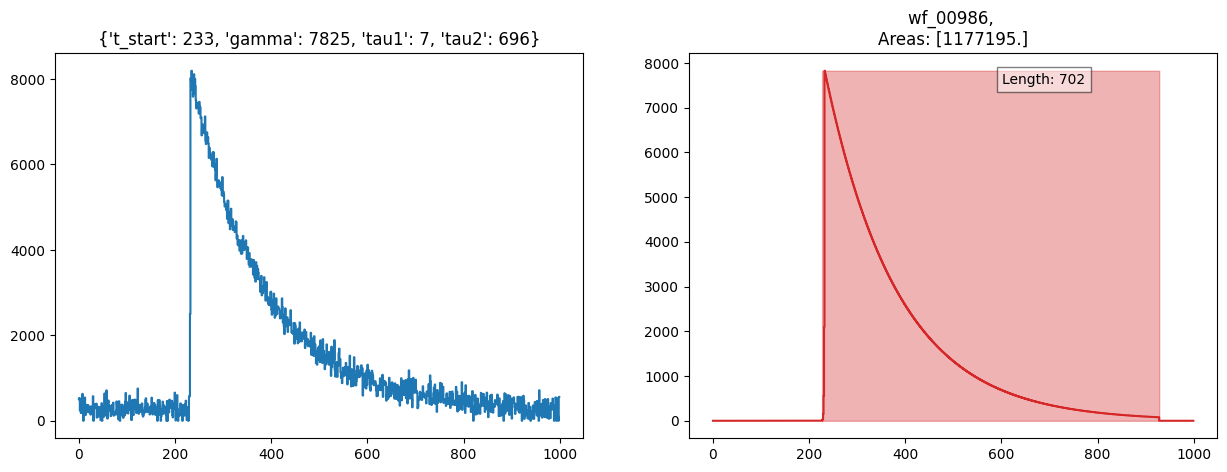

In [4]:
gammasim.plot_wf(idx="max")

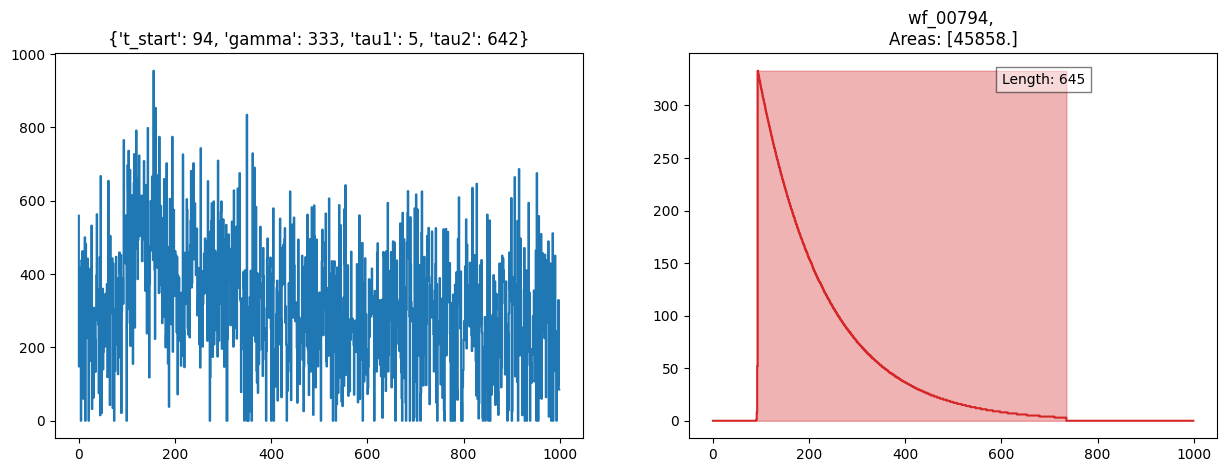

In [5]:
gammasim.plot_wf(idx="min")

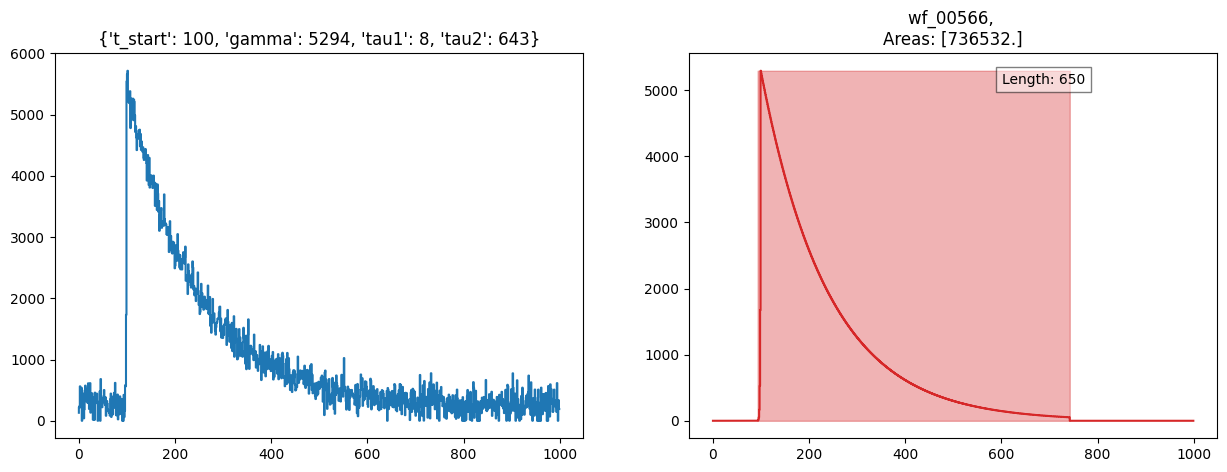

In [6]:
gammasim.plot_wf(idx="random")